In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import glob
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

## Comparing Tame Equivalent Widths with By-Hand Measurements

### Automated Tame Run

In [178]:
# Read in ew data

ew_hand = pd.read_csv("ngc2506_2380red_oned_26jan14.ew",delim_whitespace=True,header = None)
ew_tame = pd.read_csv("tame-1.1.0/ngc2506_2380red_oned_26jan14.aout",skiprows=1,delim_whitespace=True,header=None)

In [179]:
hand_df = ew_hand[[0,4]]  # Wavelength and Equivalent Width
tame_df = ew_tame[[0,4]]  # Wavelength and Equivalent Width

# Are they in order?
np.array(hand_df[0]) - np.array(tame_df[0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [217]:
np.array(hand_df[4])
pdiff = ((np.array(tame_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
#print(pdiff)
#print(np.mean(pdiff),np.median(pdiff),np.std(pdiff))
"""
fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.plot(hand_df[0],pdiff,'.')
plt.grid()
plt.xlabel("Wavelength")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand")
"""

'\nfig = plt.figure(figsize=(15,10))\nfig.dpi = 200\nplt.plot(hand_df[0],pdiff,\'.\')\nplt.grid()\nplt.xlabel("Wavelength")\nplt.ylabel("Equivalent Width Percent Difference")\nplt.title("Equivalent Width Agreement between TAME and By-Hand")\n'

In [238]:
tame_outputs = glob.glob('tame-1.1.0/*.aout')
byhand_outputs = [output.split('/')[-1].split('.')[0]+".ew" for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]

Fraction of Lines with greater than 10% Difference: 0.27380952380952384
Lines with greater than 20% Difference: [ 5607.66  5698.02  5760.35  5811.92  5861.11  6120.25]
Lines with greater than 30% Difference: [ 5861.11]


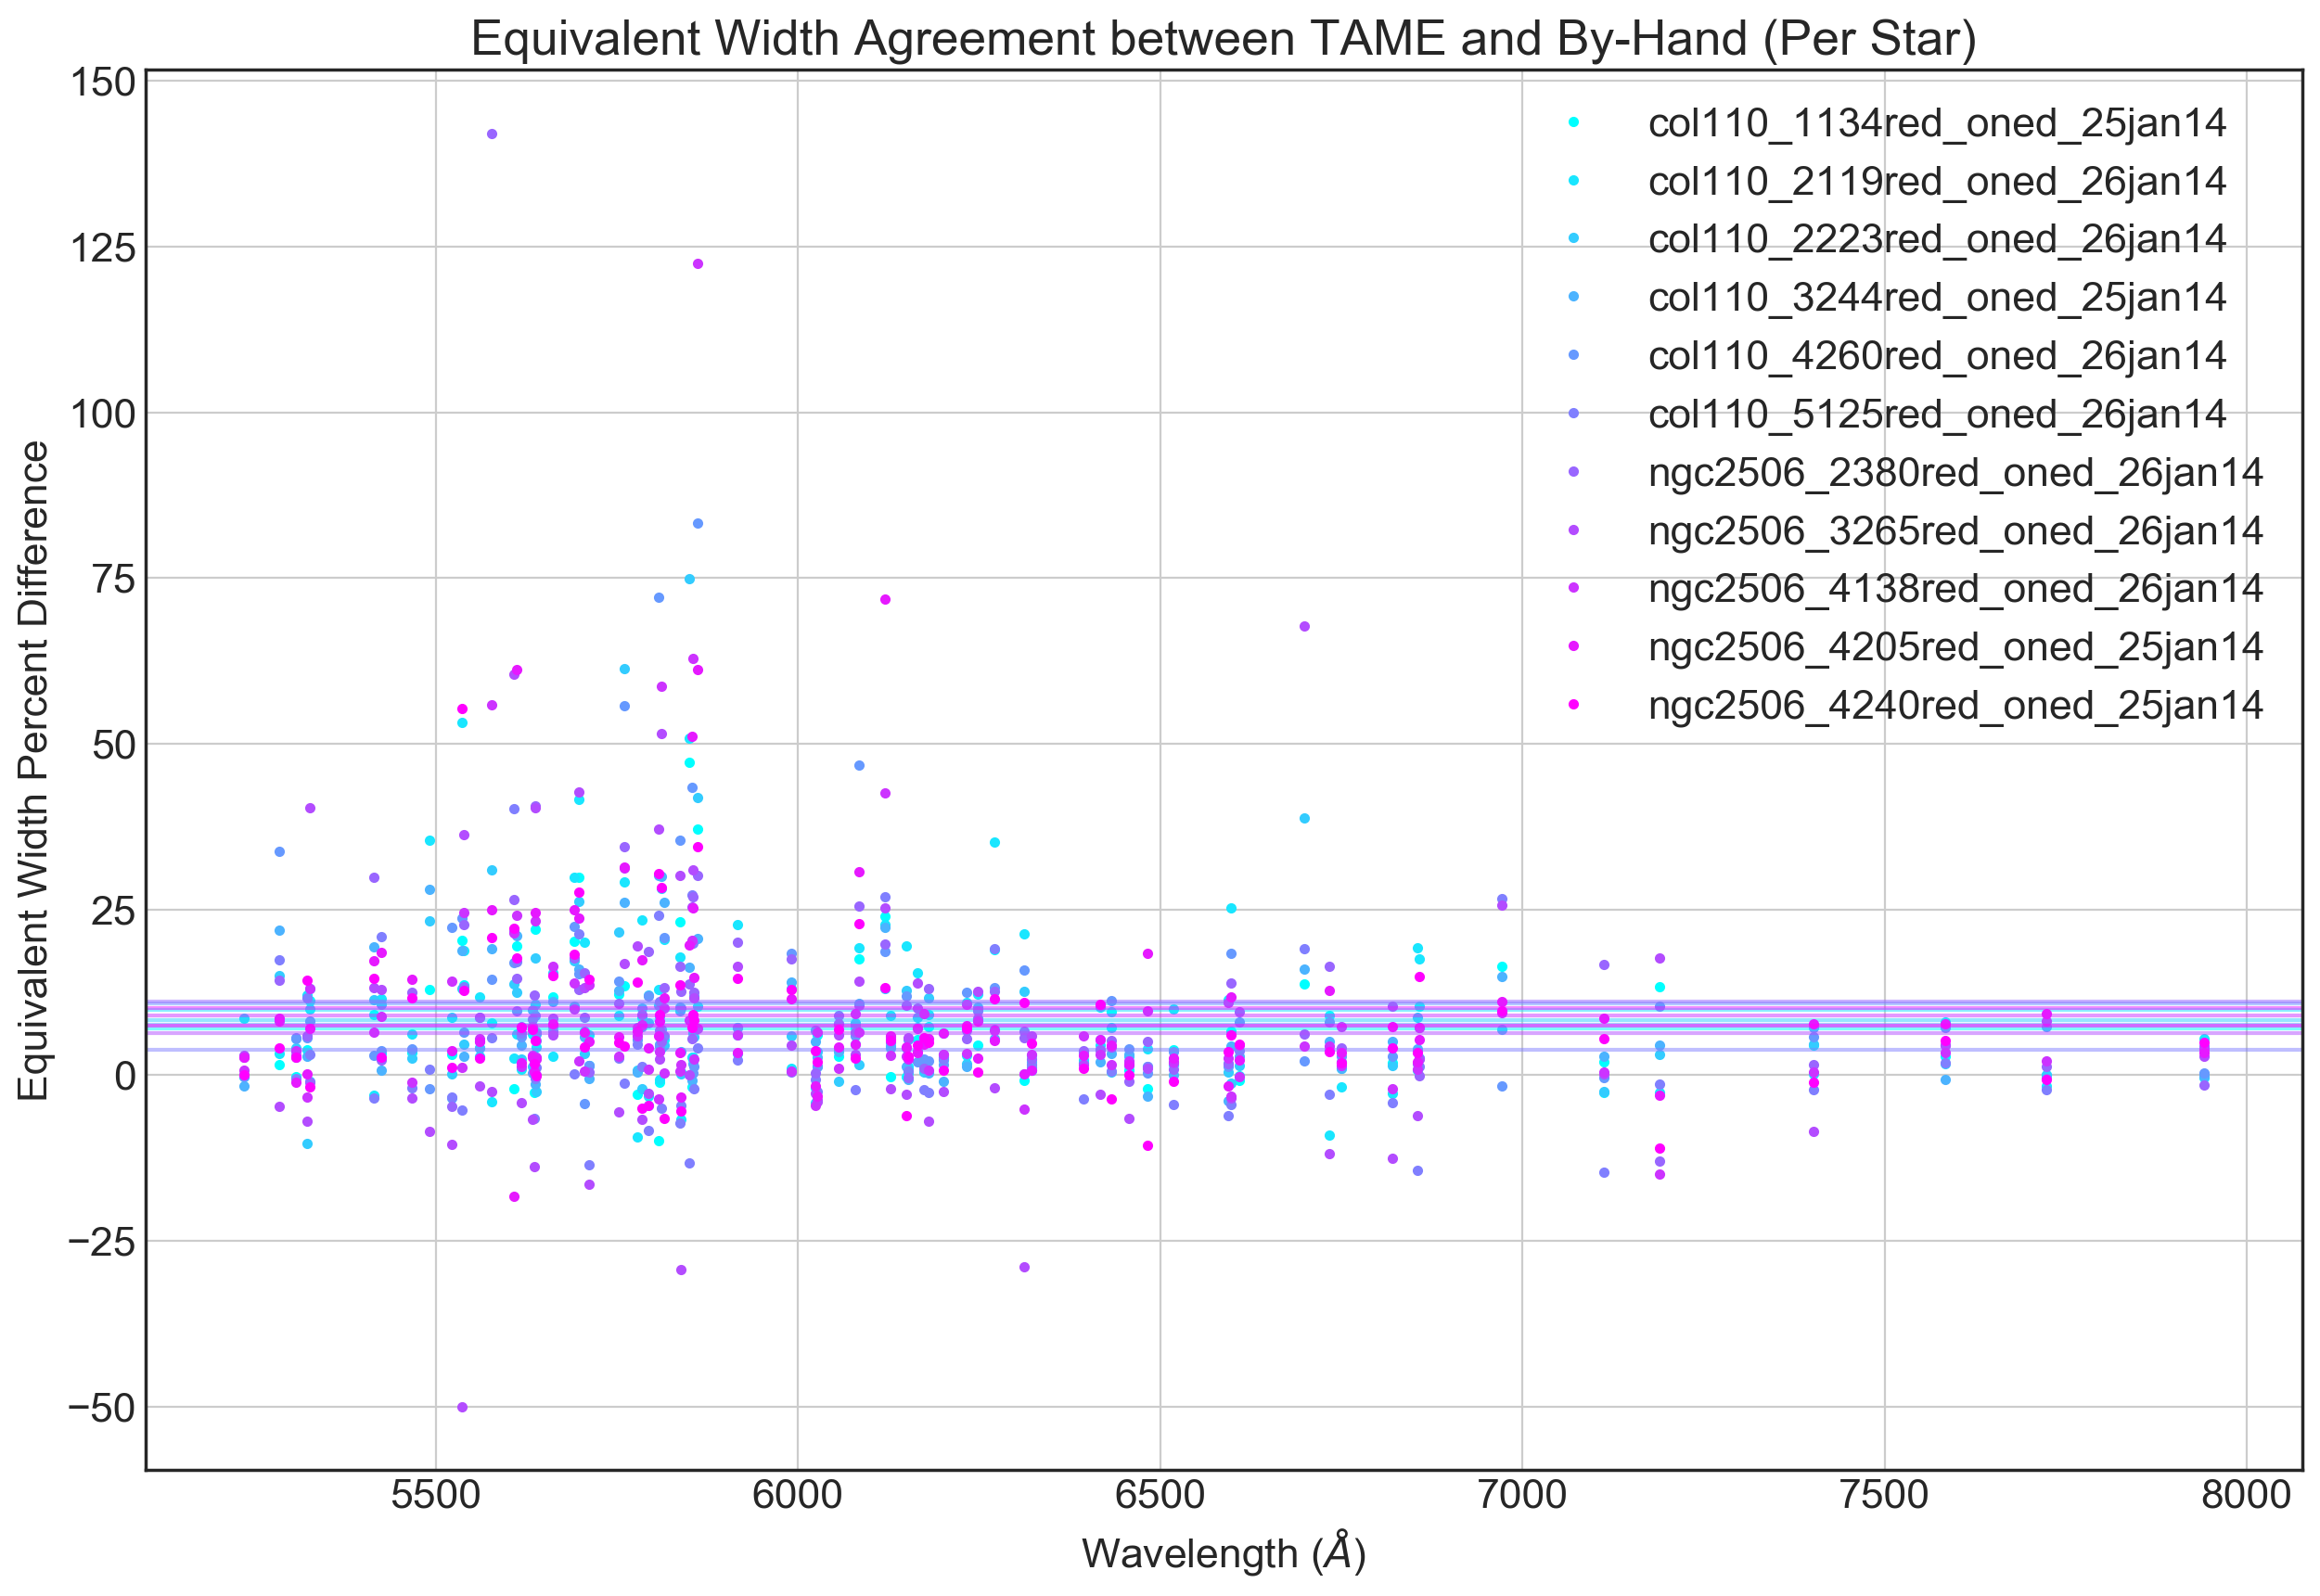

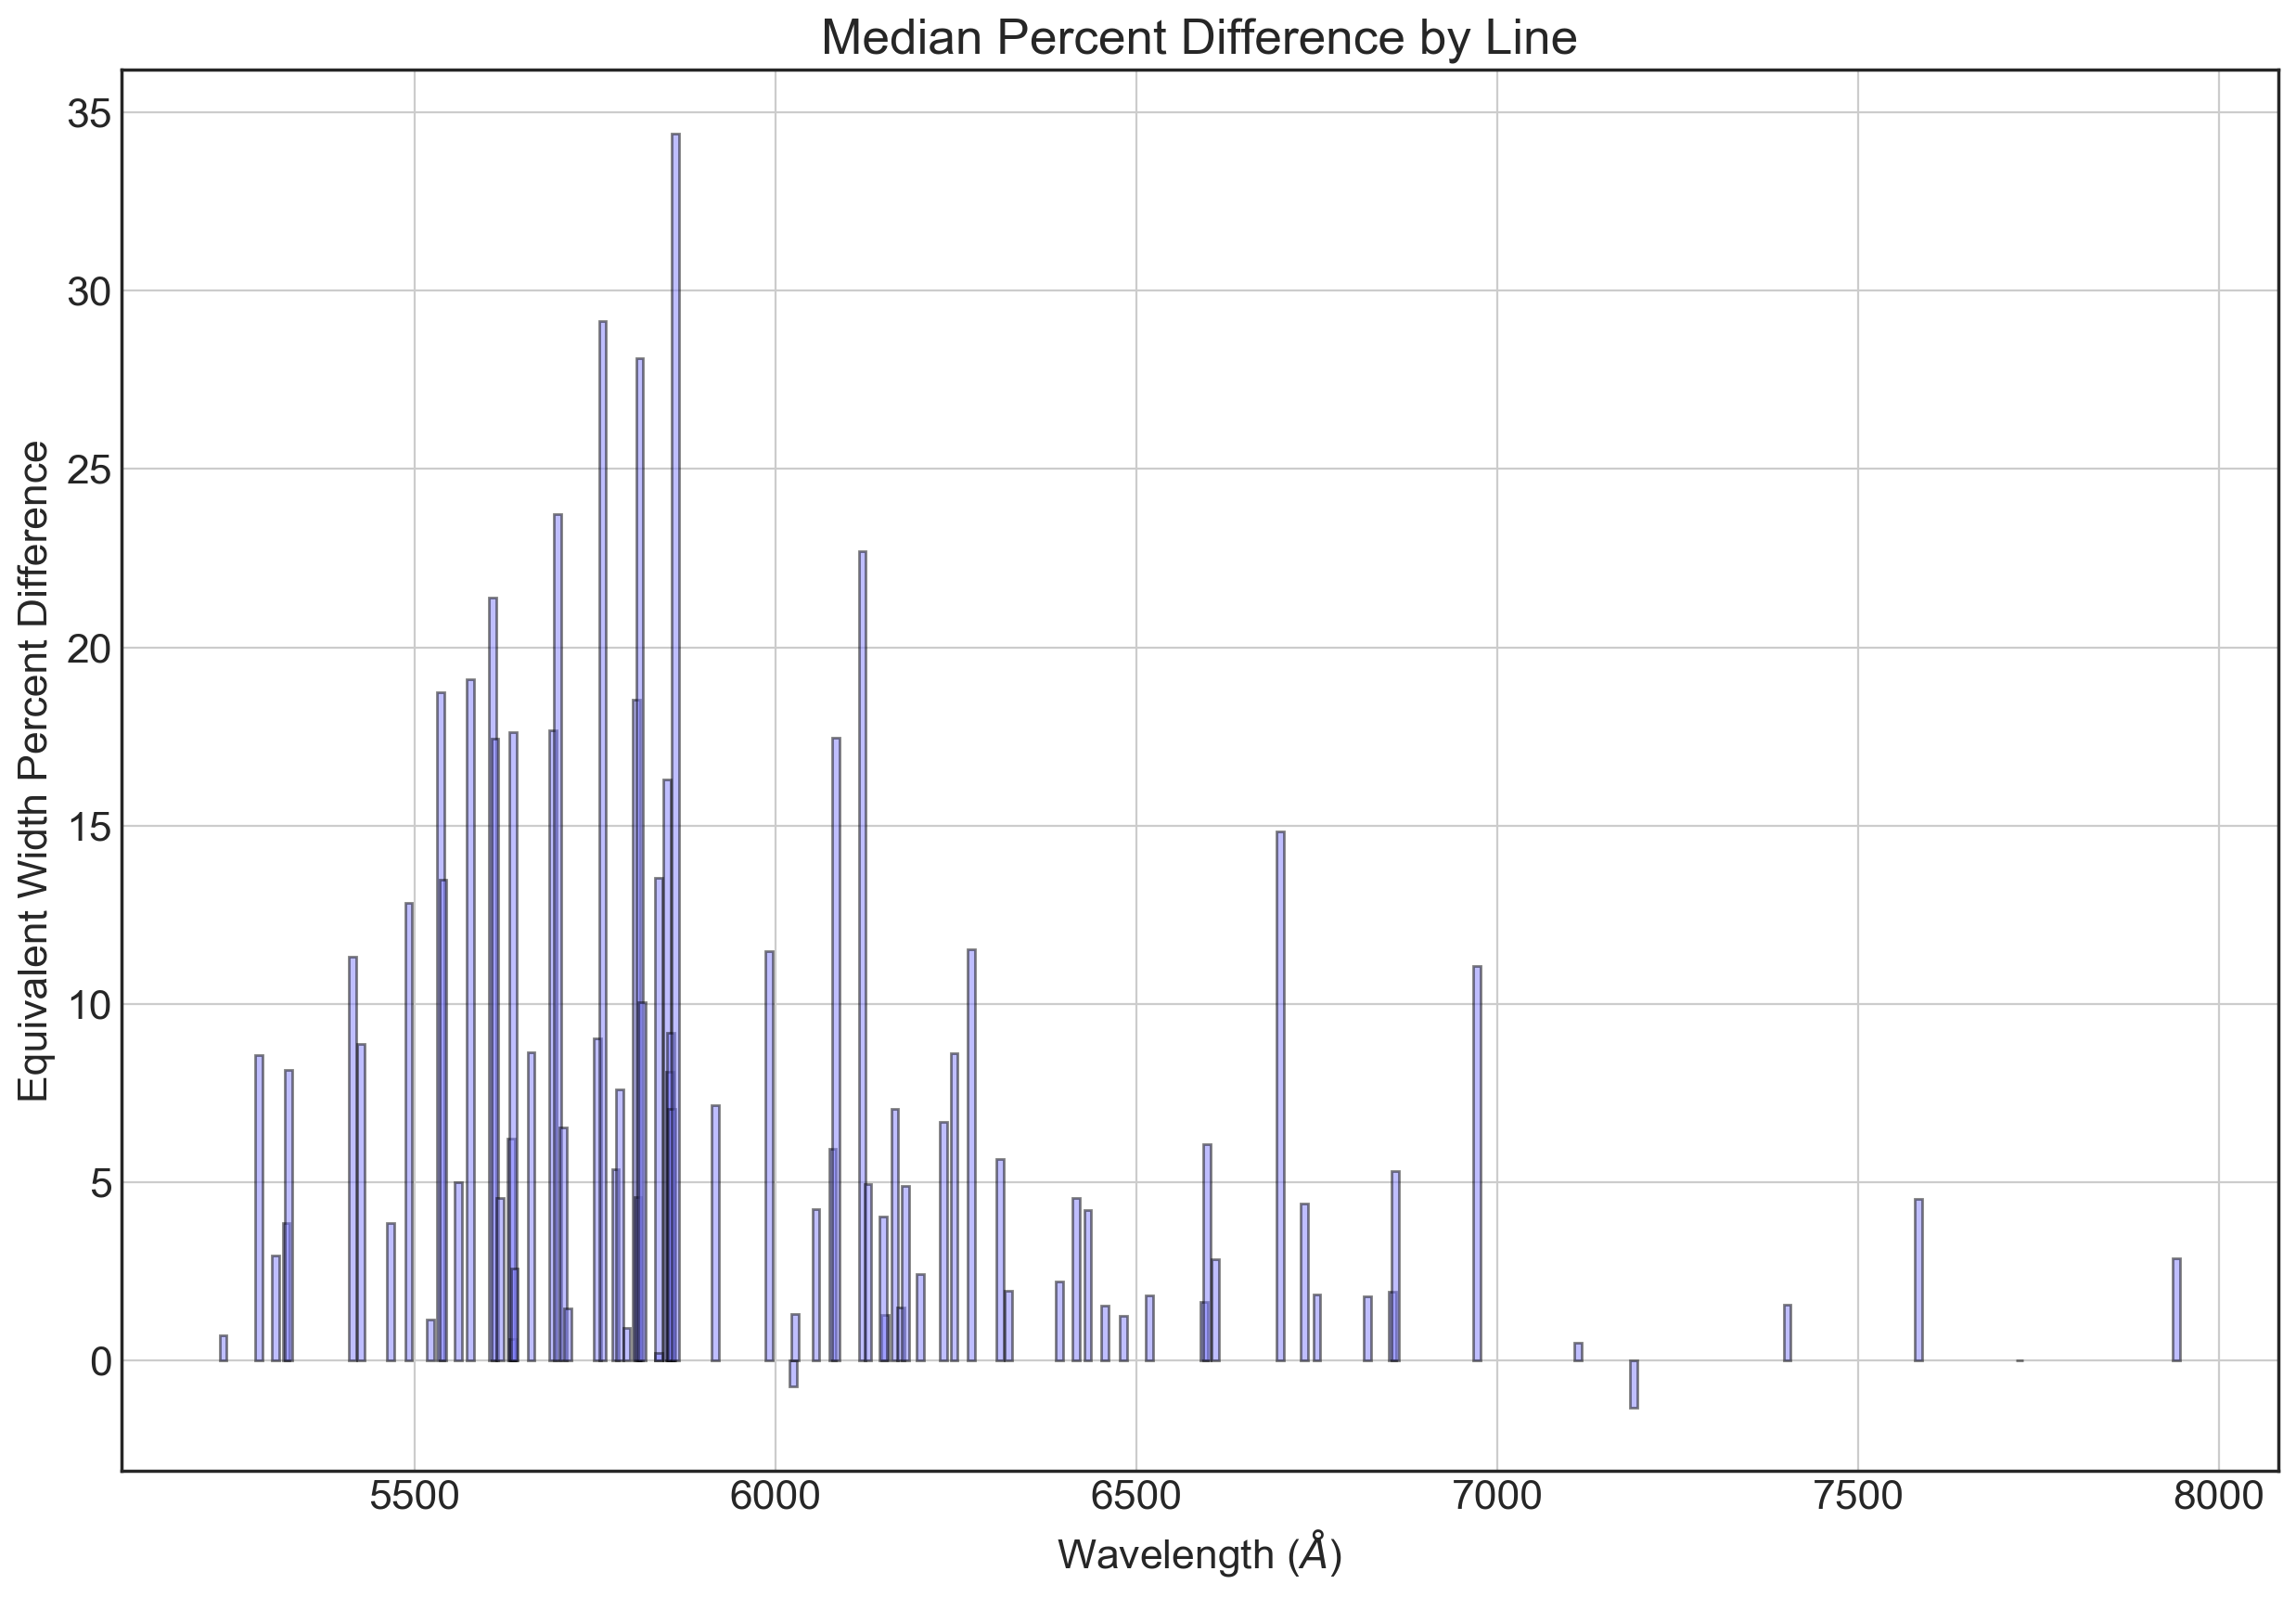

In [299]:
fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand (Per Star)")


color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    hand_df = ew_hand[[0,4]]  # Wavelength and Equivalent Width
    tame_df = ew_tame[[0,4]]  # Wavelength and Equivalent Width
    np.array(hand_df[4])
    pdiff = ((np.array(tame_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    pdiff_avg.append(pdiff)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val)]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val)]
    plt.plot(masked_wav,masked_pdiff,'.', color=plt.cm.cool(i), label=label)
    plt.axhline(np.mean(masked_pdiff), alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val)] for pdiff in zipped_pdiff]
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]

fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.bar(hand_df[0], pdiff_avg, align='center', alpha=0.5,width=10,color = plt.cm.cool(0.5),ec='k')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Median Percent Difference by Line")

# Specific Issue Lines
print("Fraction of Lines with greater than 10% Difference:", len(np.array(hand_df[0])[np.array(pdiff_avg) >10])/len(hand_df[0]))
print("Lines with greater than 20% Difference:",np.array(hand_df[0])[np.array(pdiff_avg) >20])
print("Lines with greater than 30% Difference:",np.array(hand_df[0])[np.array(pdiff_avg) >30])

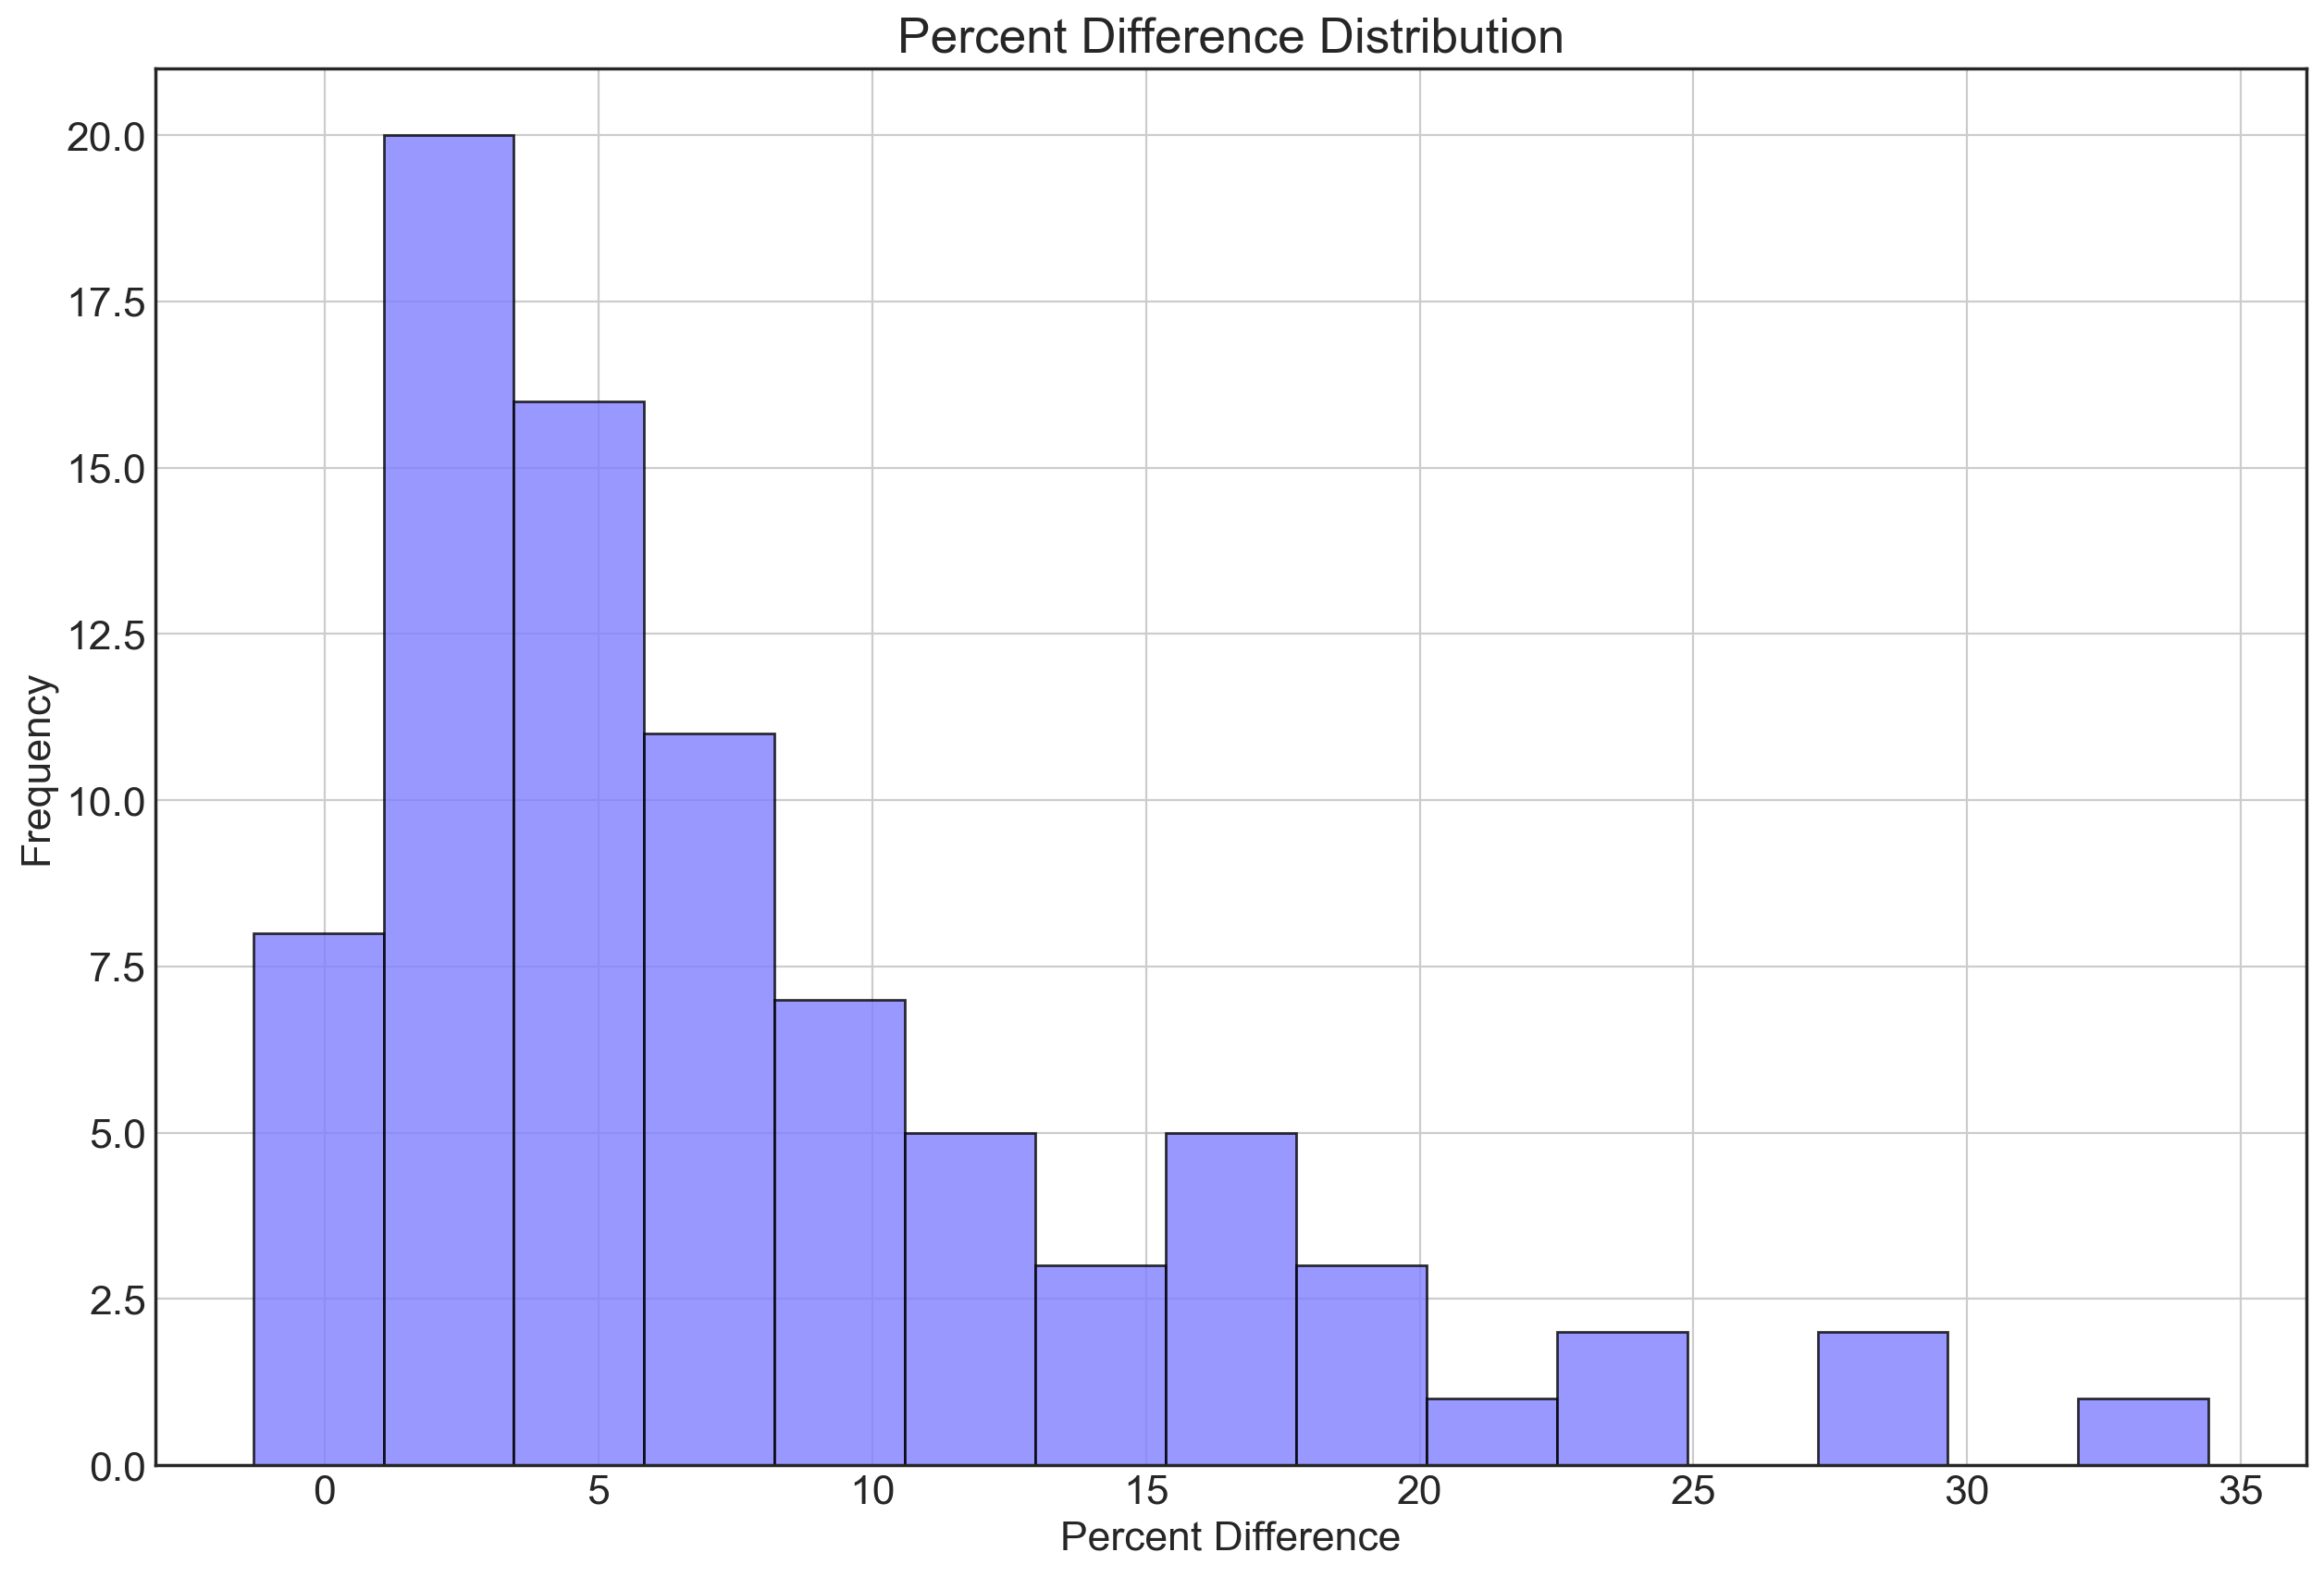

In [281]:
fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.hist(pdiff_avg, alpha=0.8,color = plt.cm.cool(0.5),ec='k',histtype='bar',bins=15)

plt.xlabel(r"Percent Difference")
plt.ylabel("Frequency")
plt.title("Percent Difference Distribution")



### Interactive Tame Run
Mainly adjusting background level to reasonable value. This run was checked line by line with by-hand values, so agreement is biased in favor of by-hand values. From an initial run on one spectra, it looks like an interactive run with default settings can get us up to about 90% within 5% and 95% within 10%

Fraction of Lines with less than 5% Difference: 0.9036144578313253
Fraction of Lines with less than 10% Difference: 0.963855421686747
Lines with greater than 5% Difference: [ 5522.45  5753.12  5760.35  5807.78  5837.7   5861.11  6311.5   5284.1 ]
Lines with greater than 10% Difference: [ 5522.45  5760.35  5807.78]


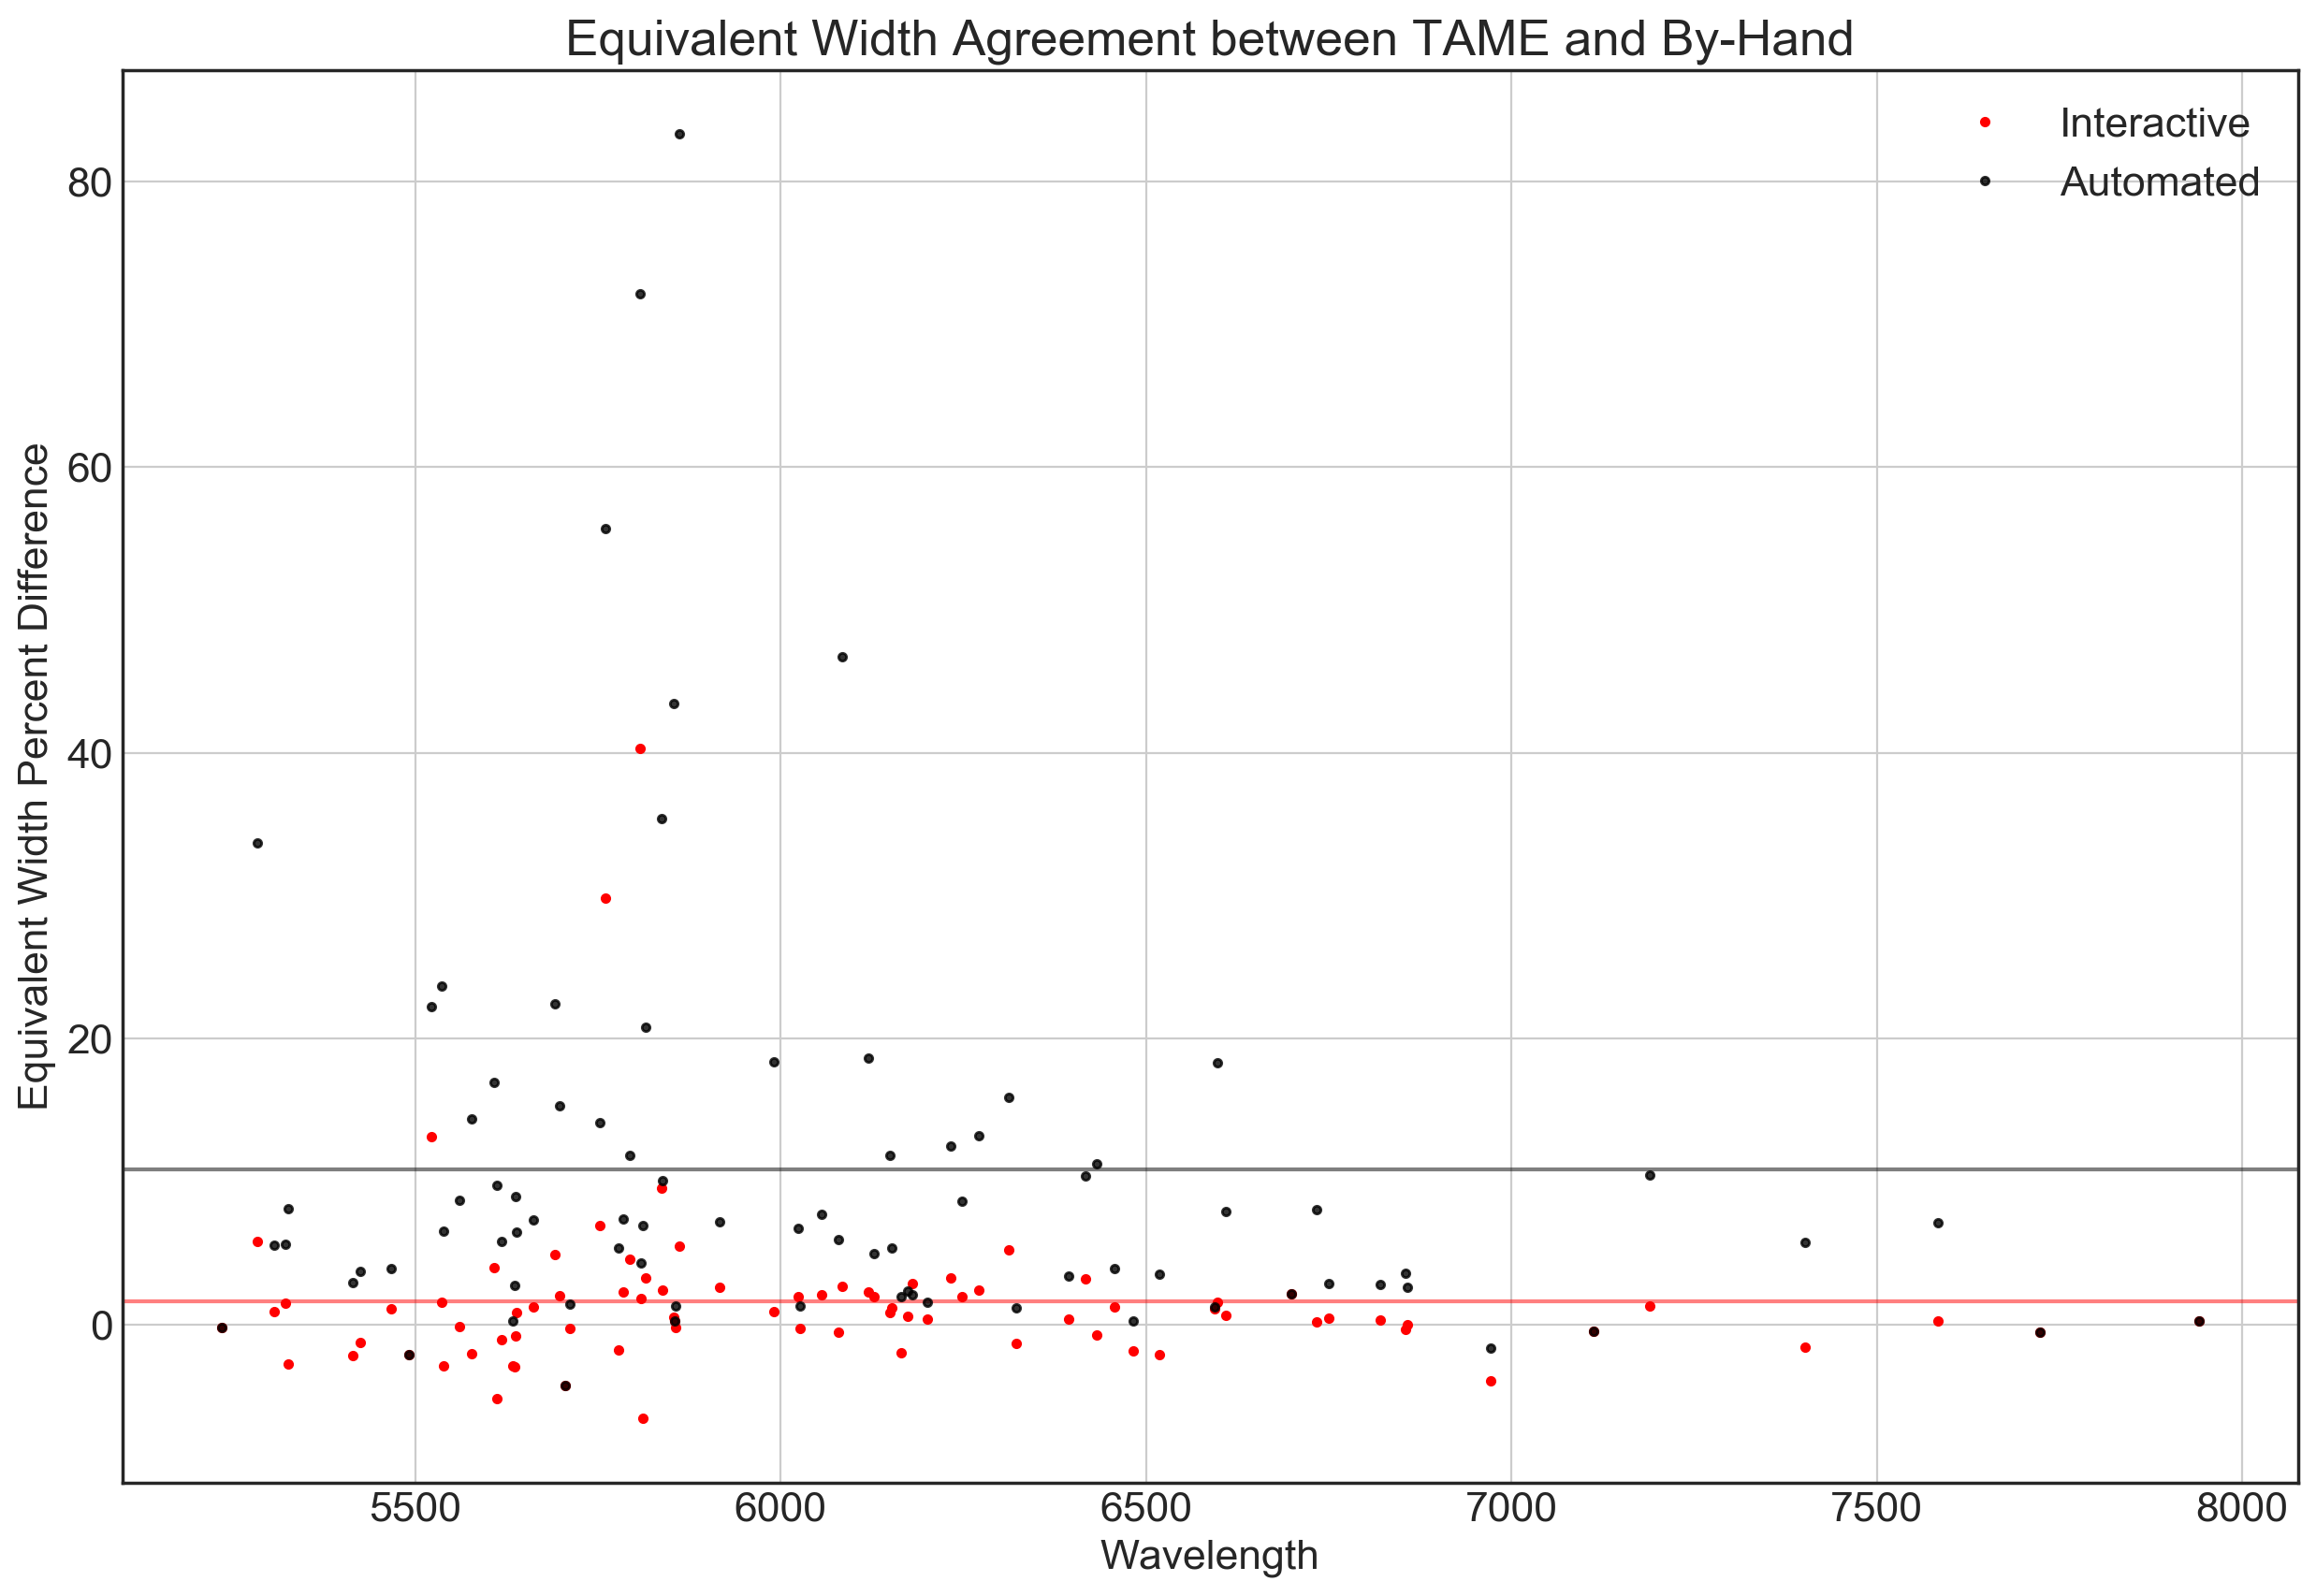

In [40]:
ew_hand = pd.read_csv("data/col110_4260red_oned_26jan14.ew",delim_whitespace=True,header = None)
ew_tame_int = pd.read_csv("tame-1.1.0/col110_4260red_oned_26jan14_adjust.aout",skiprows=1,delim_whitespace=True,header=None)
ew_tame_auto = pd.read_csv("tame-1.1.0/col110_4260red_oned_26jan14.aout",skiprows=1,delim_whitespace=True,header=None)

hand_df = ew_hand[[0,4]]  # Wavelength and Equivalent Width
int_df = ew_tame_int[[0,4]]  # Wavelength and Equivalent Width
auto_df = ew_tame_auto[[0,4]]  # Wavelength and Equivalent Width


pdiff_auto = ((np.array(auto_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
pdiff_int = ((np.array(int_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100

masked_pdiff_auto = [val for val in pdiff_auto if not np.isinf(val)]
masked_pdiff_int = [val for val in pdiff_int if not np.isinf(val)]
masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val)]

fig = plt.figure(figsize=(15,10))
fig.dpi = 200

plt.plot(masked_wav,masked_pdiff_int,'.', alpha=1.0, color='r', label='Interactive')
plt.axhline(np.mean(masked_pdiff_int), alpha=0.5, color='r')
plt.plot(masked_wav,masked_pdiff_auto,'.', alpha=0.8, color='k', label='Automated')
plt.axhline(np.mean(masked_pdiff_auto), alpha=0.5, color='k')
            
plt.grid()
plt.xlabel("Wavelength")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand")
plt.legend()

print("Fraction of Lines with less than 5% Difference:", len(np.array(masked_wav)[np.array(masked_pdiff_int) <5])/len(masked_wav))
print("Fraction of Lines with less than 10% Difference:", len(np.array(masked_wav)[np.array(masked_pdiff_int) <10])/len(masked_wav))
print("Lines with greater than 5% Difference:",np.array(masked_wav)[np.array(masked_pdiff_int) >5])
print("Lines with greater than 10% Difference:",np.array(masked_wav)[np.array(masked_pdiff_int) >10])

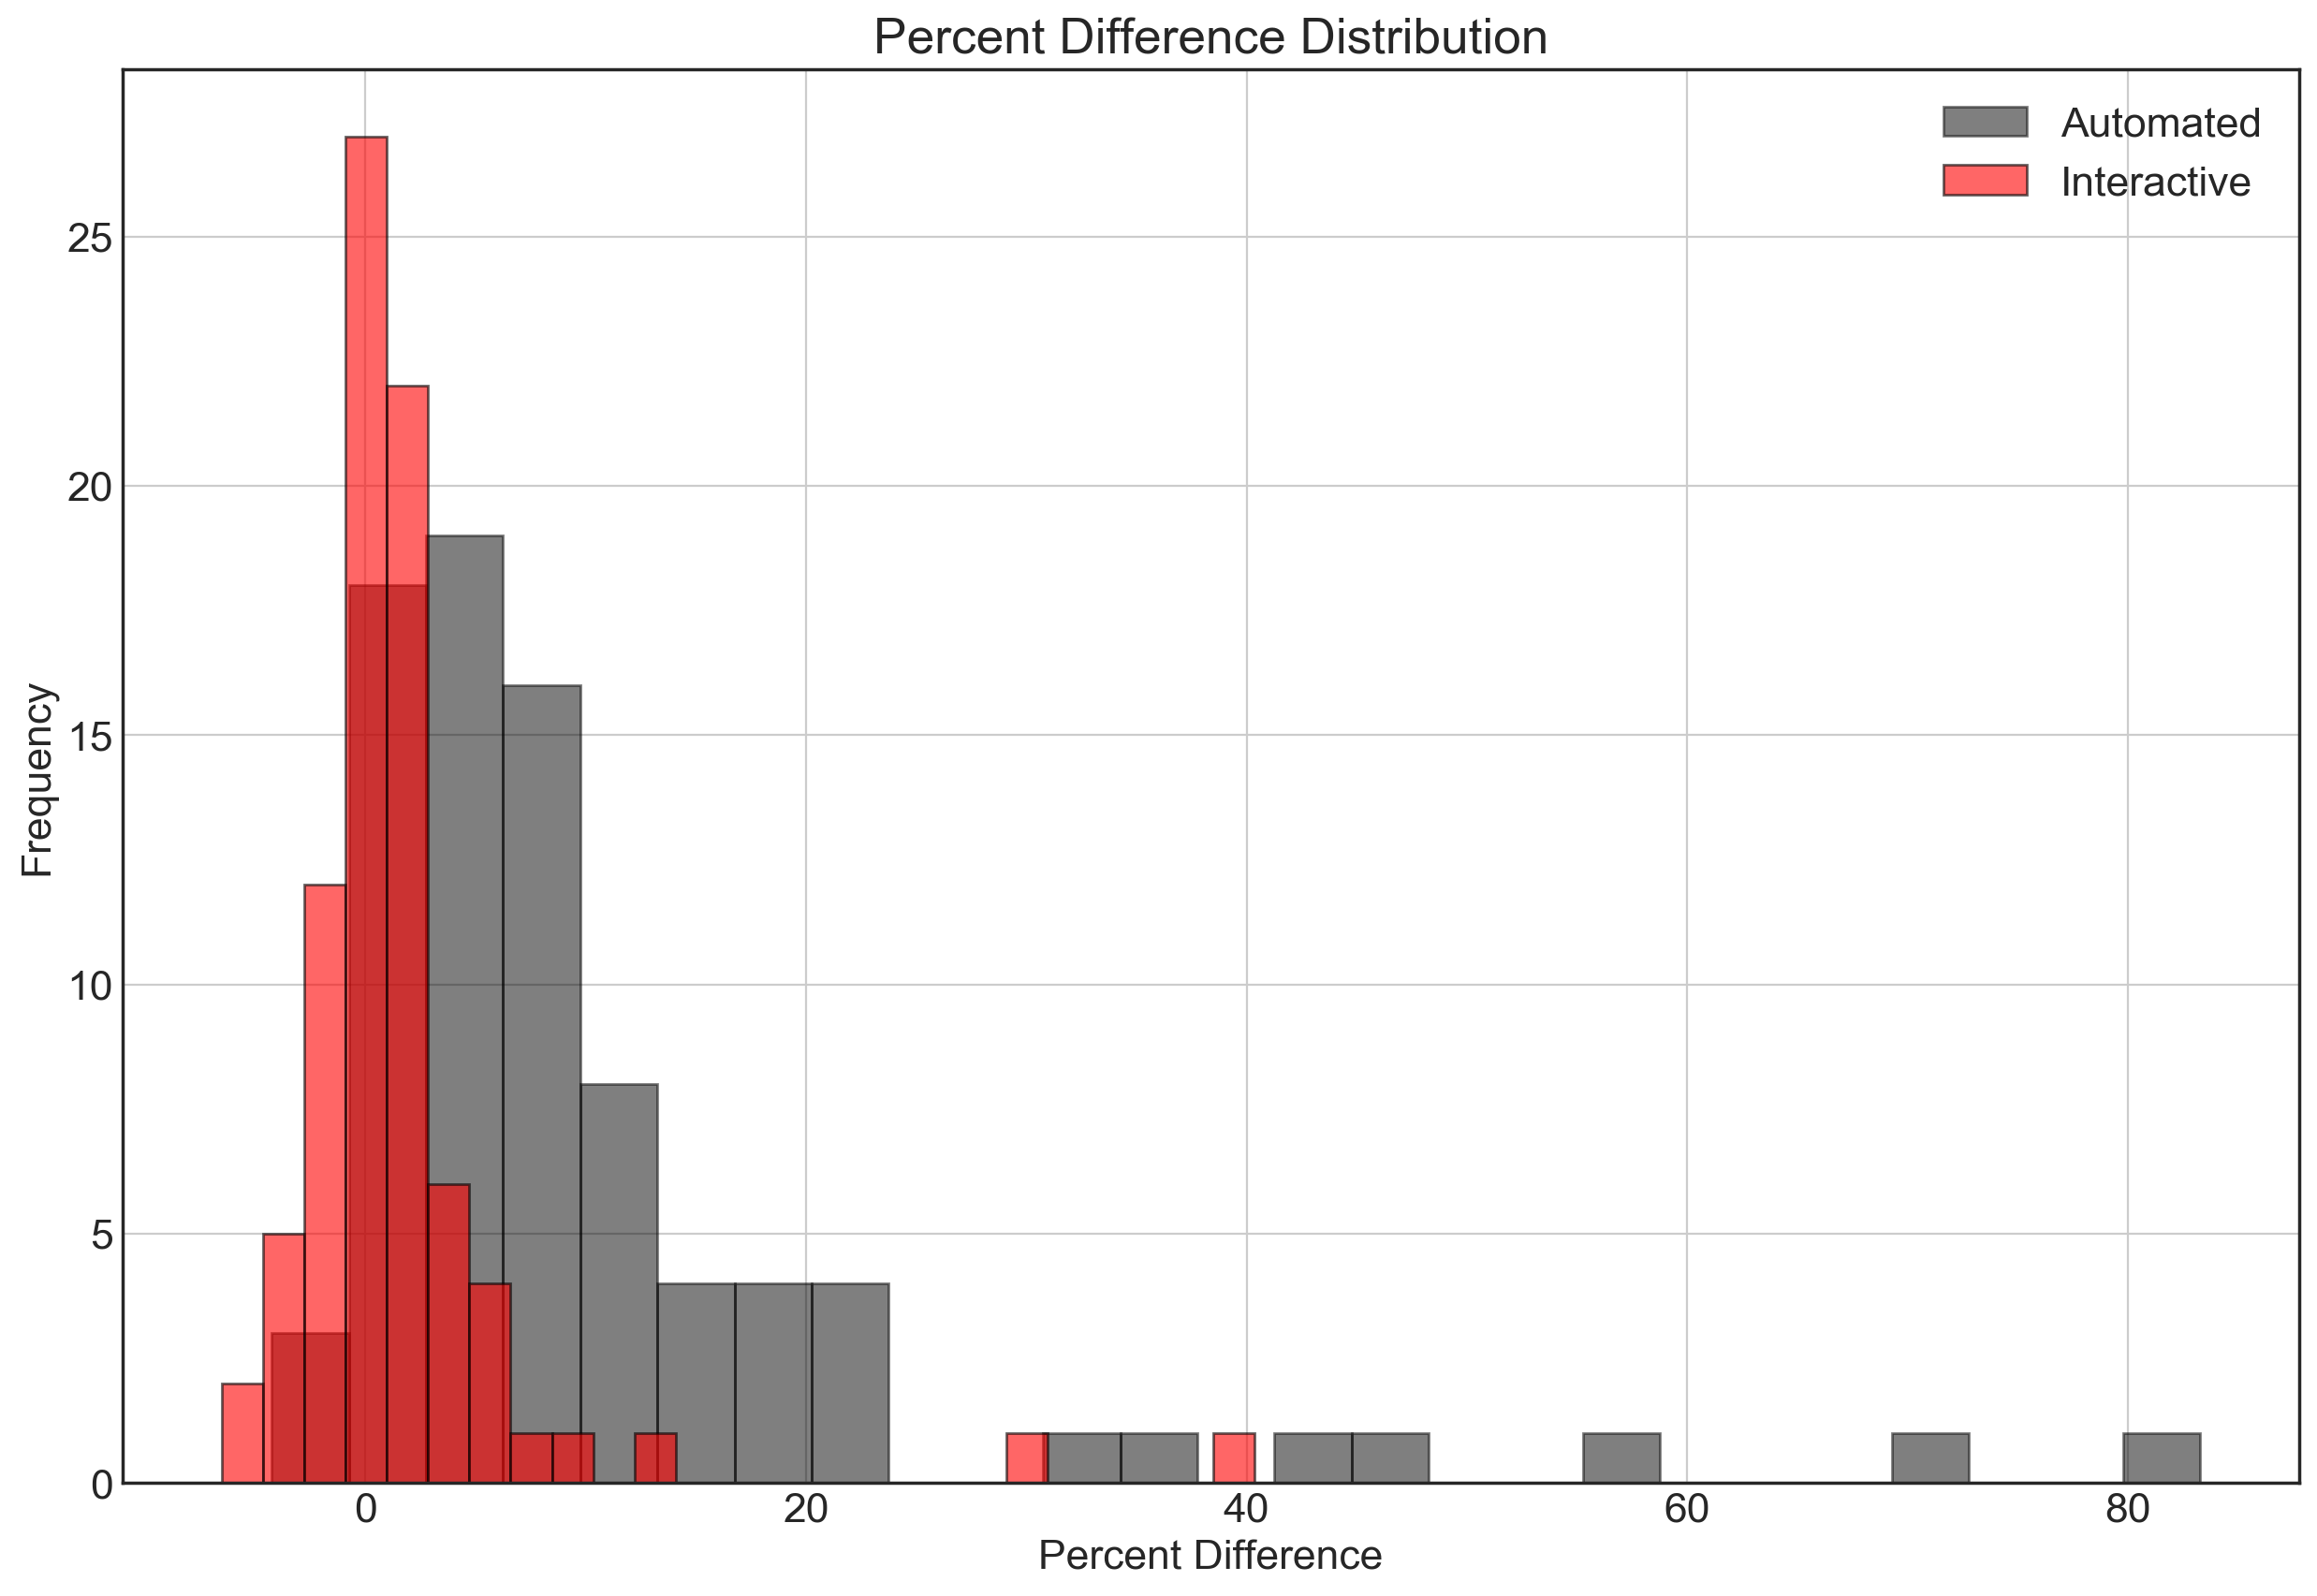

In [50]:
fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()

plt.hist(masked_pdiff_auto, alpha=0.5,color = 'k',ec='k',histtype='bar',bins=25, label = 'Automated')
plt.hist(masked_pdiff_int, alpha=0.6,color = 'r',ec='k',histtype='bar',bins=25, label = 'Interactive')
plt.xlabel(r"Percent Difference")
plt.ylabel("Frequency")
plt.title("Percent Difference Distribution")
plt.legend()